In [1]:
import pandas as pd
import numpy as np
import os

print("Pandas version:", pd.__version__)
print("NumPy version:", np.__version__)

Pandas version: 2.2.3
NumPy version: 2.1.3


In [2]:
sales_path = "/workspace/sales.csv" if os.path.exists("/workspace/sales.csv") else r"C:\Users\kerin\OneDrive\MIU\Python Course\ventas.csv"
inventories_path = "/workspace/inventories.csv" if os.path.exists("/workspace/inventories.csv") else r"C:\Users\kerin\OneDrive\MIU\Python Course\inventarios.csv"
satisfaction_path = "/workspace/satisfaction.csv" if os.path.exists("/workspace/satisfaction.csv") else r"C:\Users\kerin\OneDrive\MIU\Python Course\satisfaccion.csv"

In [3]:
sales = pd.read_csv(sales_path).dropna()
inventories = pd.read_csv(inventories_path).dropna()
satisfaction = pd.read_csv(satisfaction_path).dropna()

print("Sales shape:", sales.shape)
print("Inventories shape:", inventories.shape)
print("Satisfaction shape:", satisfaction.shape)

sales.head()

Sales shape: (10, 5)
Inventories shape: (10, 4)
Satisfaction shape: (5, 3)


,ID_Tienda,Producto,Cantidad_Vendida,Precio_Unitario,Fecha_Venta
0,1,Producto A,20,100,2023-01-05
1,1,Producto B,15,200,2023-01-06
2,2,Producto A,30,100,2023-01-07
3,2,Producto C,25,300,2023-01-08
4,3,Producto A,10,100,2023-01-09


In [4]:
print("Sales columns:", sales.columns.tolist())
print("Inventories columns:", inventories.columns.tolist())
print("Satisfaction columns:", satisfaction.columns.tolist())

sales.head()


Sales columns: ['ID_Tienda', 'Producto', 'Cantidad_Vendida', 'Precio_Unitario', 'Fecha_Venta']
Inventories columns: ['ID_Tienda', 'Producto', 'Stock_Disponible', 'Fecha_Actualización']
Satisfaction columns: ['ID_Tienda', 'Satisfacción_Promedio', 'Fecha_Evaluación']


,ID_Tienda,Producto,Cantidad_Vendida,Precio_Unitario,Fecha_Venta
0,1,Producto A,20,100,2023-01-05
1,1,Producto B,15,200,2023-01-06
2,2,Producto A,30,100,2023-01-07
3,2,Producto C,25,300,2023-01-08
4,3,Producto A,10,100,2023-01-09


In [5]:
sales = sales.rename(columns={
    "ID_Tienda": "store_id",
    "Producto": "product_id",
    "Cantidad_Vendida": "quantity_sold",
    "Precio_Unitario": "unit_price",
    "Fecha_Venta": "date"
})

inventories = inventories.rename(columns={
    "ID_Tienda": "store_id",
    "Producto": "product_id",
    "Stock_Disponible": "stock_on_hand",
    "Fecha_Actualización": "date_updated"
})

satisfaction = satisfaction.rename(columns={
    "ID_Tienda": "store_id",
    "Satisfacción_Promedio": "satisfaction_pct",
    "Fecha_Evaluación": "date_evaluated"
})

print("Columns renamed successfully!")


Columns renamed successfully!


In [6]:
sold = sales.groupby(["store_id", "product_id"])["quantity_sold"].sum().reset_index()
merged = inventories.merge(sold, on=["store_id", "product_id"], how="left").fillna(0)

merged["turnover"] = merged["quantity_sold"] / merged["stock_on_hand"]
merged["pct_sold_vs_stock"] = (merged["quantity_sold"] / merged["stock_on_hand"]) * 100

critical = merged[merged["pct_sold_vs_stock"] < 10]
print("Critical inventory items (sold < 10% of stock):")
print(critical.head())


Critical inventory items (sold < 10% of stock):
Empty DataFrame
Columns: [store_id, product_id, stock_on_hand, date_updated, quantity_sold, turnover, pct_sold_vs_stock]
Index: []


In [7]:
sales_by_store_product = sales.groupby(["store_id", "product_id"])["quantity_sold"].sum().reset_index()
print(sales_by_store_product.head())

sales["revenue"] = sales["quantity_sold"] * sales["unit_price"]
revenue_by_store = sales.groupby("store_id")["revenue"].sum().reset_index()
print(revenue_by_store)

print(sales["quantity_sold"].describe())


   store_id  product_id  quantity_sold
0         1  Producto A             20
1         1  Producto B             15
2         2  Producto A             30
3         2  Producto C             25
4         3  Producto A             10
   store_id  revenue
0         1     5000
1         2    10500
2         3     9000
3         4    13000
4         5    13000
count    10.000000
mean     25.000000
std       9.128709
min      10.000000
25%      20.000000
50%      25.000000
75%      30.000000
max      40.000000
Name: quantity_sold, dtype: float64


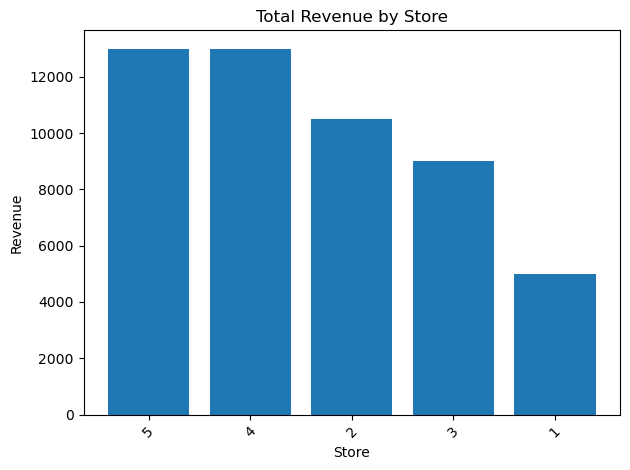

In [8]:
import matplotlib.pyplot as plt

revenue_by_store_sorted = revenue_by_store.sort_values("revenue", ascending=False)

plt.figure()
plt.bar(revenue_by_store_sorted["store_id"].astype(str),
        revenue_by_store_sorted["revenue"])

plt.title("Total Revenue by Store")
plt.xlabel("Store")
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [9]:
sold = sales.groupby(["store_id", "product_id"])["quantity_sold"].sum().reset_index()

merged = inventories.merge(sold, on=["store_id", "product_id"], how="left").fillna({"quantity_sold": 0})

merged["turnover"] = merged["quantity_sold"] / merged["stock_on_hand"].replace({0: np.nan})

merged["pct_sold_vs_stock"] = (merged["quantity_sold"] / merged["stock_on_hand"].replace({0: np.nan})) * 100

critical = merged[merged["pct_sold_vs_stock"] < 10]

print("Inventory analysis complete!")
print("First 5 rows of merged data:")
display(merged.head())

print("Critical items (sold < 10% of stock):")
display(critical.head())


Inventory analysis complete!
First 5 rows of merged data:


,store_id,product_id,stock_on_hand,date_updated,quantity_sold,turnover,pct_sold_vs_stock
0,1,Producto A,50,2023-01-05,20,0.400000,40.000000
1,1,Producto B,40,2023-01-06,15,0.375000,37.500000
2,2,Producto A,60,2023-01-07,30,0.500000,50.000000
3,2,Producto C,45,2023-01-08,25,0.555556,55.555556
4,3,Producto A,30,2023-01-09,10,0.333333,33.333333


Critical items (sold < 10% of stock):


,store_id,product_id,stock_on_hand,date_updated,quantity_sold,turnover,pct_sold_vs_stock


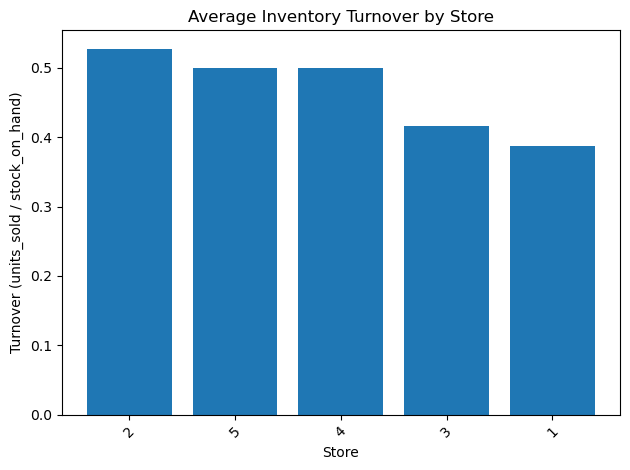

In [10]:
import matplotlib.pyplot as plt

turnover_by_store = (
    merged.groupby("store_id", as_index=False)["turnover"]
          .mean()
          .fillna(0)
          .sort_values("turnover", ascending=False)
)

plt.figure()
plt.bar(turnover_by_store["store_id"].astype(str),
        turnover_by_store["turnover"])
plt.title("Average Inventory Turnover by Store")
plt.xlabel("Store")
plt.ylabel("Turnover (units_sold / stock_on_hand)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [11]:
print("Minimum % sold:", merged["pct_sold_vs_stock"].min())
print("Maximum % sold:", merged["pct_sold_vs_stock"].max())
print("Average % sold:", merged["pct_sold_vs_stock"].mean())

merged.sort_values("pct_sold_vs_stock", ascending=True).head(10)


Minimum % sold: 33.33333333333333
Maximum % sold: 55.55555555555556
Average % sold: 46.638888888888886


,store_id,product_id,stock_on_hand,date_updated,quantity_sold,turnover,pct_sold_vs_stock
4,3,Producto A,30,2023-01-09,10,0.333333,33.333333
1,1,Producto B,40,2023-01-06,15,0.375000,37.500000
0,1,Producto A,50,2023-01-05,20,0.400000,40.000000
2,2,Producto A,60,2023-01-07,30,0.500000,50.000000
6,4,Producto C,70,2023-01-11,35,0.500000,50.000000
5,3,Producto B,80,2023-01-10,40,0.500000,50.000000
7,4,Producto A,50,2023-01-12,25,0.500000,50.000000
8,5,Producto B,40,2023-01-13,20,0.500000,50.000000
9,5,Producto C,60,2023-01-14,30,0.500000,50.000000
3,2,Producto C,45,2023-01-08,25,0.555556,55.555556


In [12]:
critical_by_store = (
    critical.groupby("store_id")
            .size()
            .reset_index(name="n_critical_items")
            .sort_values("n_critical_items", ascending=False)
)
display(critical_by_store)

,store_id,n_critical_items


In [13]:
satisfaction["satisfaction_pct"] = pd.to_numeric(satisfaction["satisfaction_pct"], errors="coerce")

store_perf = revenue_by_store.merge(
    satisfaction[["store_id", "satisfaction_pct"]],
    on="store_id",
    how="left"
)

print("Store performance (revenue + satisfaction):")
display(store_perf)


Store performance (revenue + satisfaction):


,store_id,revenue,satisfaction_pct
0,1,5000,85
1,2,10500,90
2,3,9000,70
3,4,13000,65
4,5,13000,55


In [14]:
low_satisfaction = store_perf[store_perf["satisfaction_pct"] < 60].copy()

print("Stores with low satisfaction (<60%):")
display(low_satisfaction)


Stores with low satisfaction (<60%):


,store_id,revenue,satisfaction_pct
4,5,13000,55


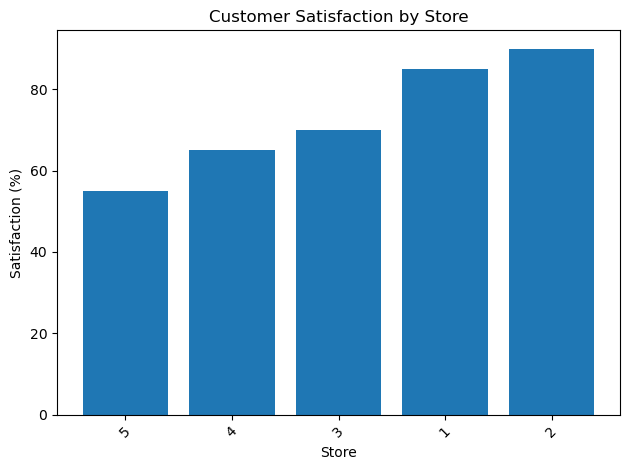

In [15]:
import matplotlib.pyplot as plt

sp_sorted = store_perf.sort_values("satisfaction_pct", ascending=True)

plt.figure()
plt.bar(sp_sorted["store_id"].astype(str), sp_sorted["satisfaction_pct"])
plt.title("Customer Satisfaction by Store")
plt.xlabel("Store")
plt.ylabel("Satisfaction (%)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [16]:
rev_q1 = store_perf["revenue"].quantile(0.25)

dual_risk = store_perf[
    (store_perf["satisfaction_pct"] < 60) &
    (store_perf["revenue"] <= rev_q1)
].copy()

print(f"Dual-risk stores (satisfaction < 60% AND revenue <= bottom quartile [{rev_q1:.2f}]):")
display(dual_risk)


Dual-risk stores (satisfaction < 60% AND revenue <= bottom quartile [9000.00]):


,store_id,revenue,satisfaction_pct


In [17]:
sales_array = store_perf["revenue"].to_numpy()

median_sales = np.median(sales_array)
std_sales = np.std(sales_array, ddof=0) 

print("Median revenue (by store):", round(median_sales, 2))
print("Standard deviation of revenue (by store):", round(std_sales, 2))


Median revenue (by store): 10500.0
Standard deviation of revenue (by store): 2973.21


In [18]:
np.random.seed(42)

n_days = 30
sim_results = []

for _, row in store_perf.iterrows():
    store = row["store_id"]
    mean_daily = row["revenue"] / n_days
    std_daily = mean_daily * 0.15  
    
    simulated = np.random.normal(loc=mean_daily, scale=std_daily, size=n_days)
    simulated = np.clip(simulated, a_min=0, a_max=None)  
    
    sim_results.append({
        "store_id": store,
        "mean_proj": simulated.mean(),
        "std_proj": simulated.std(ddof=0),
        "min_proj": simulated.min(),
        "max_proj": simulated.max()
    })

sim_df = pd.DataFrame(sim_results).sort_values("mean_proj", ascending=False)

print("Simulated 30-day sales summary:")
display(sim_df)


Simulated 30-day sales summary:


,store_id,mean_proj,std_proj,min_proj,max_proj
3,4,432.016978,58.080523,308.613204,593.444071
4,5,427.161056,65.451514,328.846923,575.712949
1,2,343.638970,48.061246,247.117318,447.244605
2,3,300.579815,43.888944,182.111470,370.408965
0,1,161.962994,22.121980,118.834661,206.146987


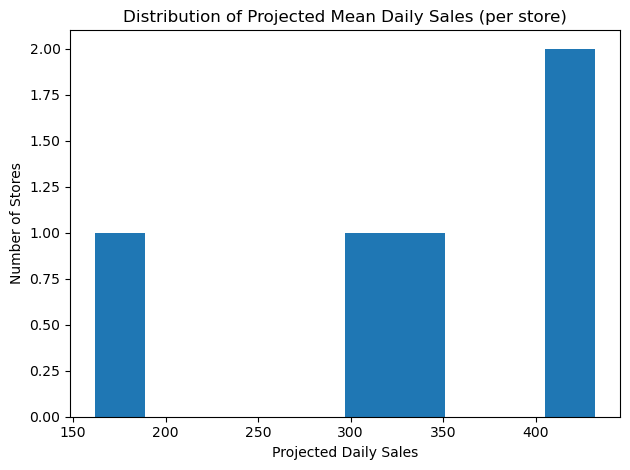

In [19]:
plt.figure()
plt.hist(sim_df["mean_proj"], bins=10)
plt.title("Distribution of Projected Mean Daily Sales (per store)")
plt.xlabel("Projected Daily Sales")
plt.ylabel("Number of Stores")
plt.tight_layout()
plt.show()


In [20]:
## Reflection and Recommendations

- **Sales:**  
  - Stores 4 and 5 made the most revenue (around 13,000 each).  
  - Store 1 made the least (about 5,000).  
  - Stores 2 and 3 are in the middle.  

- **Satisfaction:**  
  - Store 2 is the best overall: strong sales (10,500) and the highest satisfaction (90%).  
  - Stores 4 and 5 sell the most but have the lowest satisfaction (65% and 55%).  
  - This means people are buying, but they are not fully happy with their experience.  

- **Inventory:**  
  - Store 2 has the best inventory turnover (0.53), showing it sells stock quickly.  
  - Store 1 is the slowest (0.39).  
  - No items were below 10% sold, so overall stock seems okay.  

- **Simulation:**  
  - Future sales simulations confirm what we saw before.  
  - Stores 4 and 5 will likely stay on top.  
  - Store 1 will continue to struggle.  

### My Recommendations
1. **Improve customer service at Stores 4 and 5.** Sales are high, but low satisfaction could hurt in the future.  
2. **Use Store 2 as an example.** It balances sales, satisfaction, and inventory well.  
3. **Support Store 1.** Promotions or better product selection could help it catch up in sales and turnover.  


SyntaxError: invalid syntax (3188658146.py, line 3)